In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('dataset/demand_dataframe.csv')[['Time' ,'COA']]
df.head()

,Time,COA
0,01-01-12 1:00,5986.0
1,01-01-12 2:00,5547.0
2,01-01-12 3:00,5233.0
3,01-01-12 4:00,5150.0
4,01-01-12 5:00,5235.0


In [6]:
df[df.Time=='01-08-15 0:00']

,Time,COA
31391,01-08-15 0:00,15277.0


In [7]:
df_temp = pd.read_csv('dataset/df_weather2012-2018.csv')[['time' , 'temperature']]

In [8]:
df_temp['Time']=df_temp.time.map(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))

In [9]:
df_test = pd.DataFrame(pd.date_range('2012-01-01 01:00:00' , '2017-12-31 23:00:00' , freq='1H') , columns=['Time'])

In [10]:
df_test.index.freq = 'H'

In [11]:
df_test.index

RangeIndex(start=0, stop=52607, step=1)

In [12]:
df_test.head()

,Time
0,2012-01-01 01:00:00
1,2012-01-01 02:00:00
2,2012-01-01 03:00:00
3,2012-01-01 04:00:00
4,2012-01-01 05:00:00


In [13]:
df_temp.head()

,time,temperature,Time
0,1325365200,14.98,2012-01-01 00:00:00
1,1325368800,13.98,2012-01-01 01:00:00
2,1325372400,11.98,2012-01-01 02:00:00
3,1325376000,11.98,2012-01-01 03:00:00
4,1325379600,11.98,2012-01-01 04:00:00


In [14]:
df_temp.drop(columns=['time'] , inplace=True)

In [15]:
df = df.set_index('Time')
df_temp = df_temp.set_index('Time')
df_test = df_test.set_index('Time')

In [16]:
df.index = pd.to_datetime(df.index, format="%d-%m-%y %H:%M" , dayfirst=True)
df_temp.index = pd.to_datetime(df_temp.index)
df_test.index = pd.to_datetime(df_test.index)

In [17]:
df.tail()

,COA
Time,
2017-12-31 19:00:00,9495.0
2017-12-31 20:00:00,9365.0
2017-12-31 21:00:00,9250.0
2017-12-31 22:00:00,8931.0
2017-12-31 23:00:00,8679.0


In [18]:
df_temp.head()

,temperature
Time,
2012-01-01 00:00:00,14.98
2012-01-01 01:00:00,13.98
2012-01-01 02:00:00,11.98
2012-01-01 03:00:00,11.98
2012-01-01 04:00:00,11.98


In [19]:
df_temp.tail()

,temperature
Time,
2018-12-31 19:00:00,16.65
2018-12-31 20:00:00,14.73
2018-12-31 21:00:00,14.76
2018-12-31 22:00:00,13.81
2018-12-31 23:00:00,12.83


In [20]:
df_t = df_temp['2012-01-01 01:00:00':'2017-12-31 23:00:00'].merge(df_test , how = 'outer' ,on = 'Time' ).sort_values('Time')

In [21]:
df_l = df['2012-01-01 01:00:00':'2017-12-31 23:00:00'].merge(df_test , how = 'outer' ,on = 'Time' ).sort_values('Time')

In [22]:
len(df_l)

52607

In [23]:
len(df_t)

52607

In [24]:
df_t.fillna(method='ffill' , inplace=True)

In [25]:
df_t.isnull().sum()

temperature    0
dtype: int64

In [31]:
df_l.index.freq = '1H'

In [32]:
df_t.index.freq = '1H'

In [33]:
df_l['temp'] = df_t.temperature.values

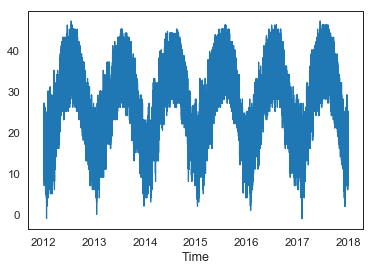

In [35]:
df_l.temp.plot()

In [36]:
df_l = df_l.reset_index()

In [37]:
df_l.dtypes

Time    datetime64[ns]
COA            float64
temp           float64
dtype: object

In [38]:
df_l['year'] = df_l['Time'].apply(lambda x: x.year)
df_l['quarter'] = df_l['Time'].apply(lambda x: x.quarter)
df_l['month'] = df_l['Time'].apply(lambda x: x.month)
df_l['day'] = df_l['Time'].apply(lambda x: x.day)
# df_l=df_l.loc[:,['Time','COA', 'year','quarter','month','day']]
df_l.sort_values('Time', inplace=True, ascending=True)
# df = df.reset_index(drop=True)
df_l["weekday"]=df_l.apply(lambda row: row["Time"].weekday(),axis=1)
df_l["weekday"] = df_l["weekday"].astype(str)
df_l = pd.get_dummies(df_l)

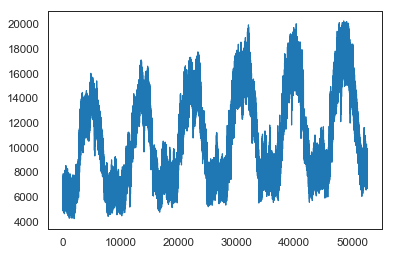

In [41]:
df_l.COA.plot()

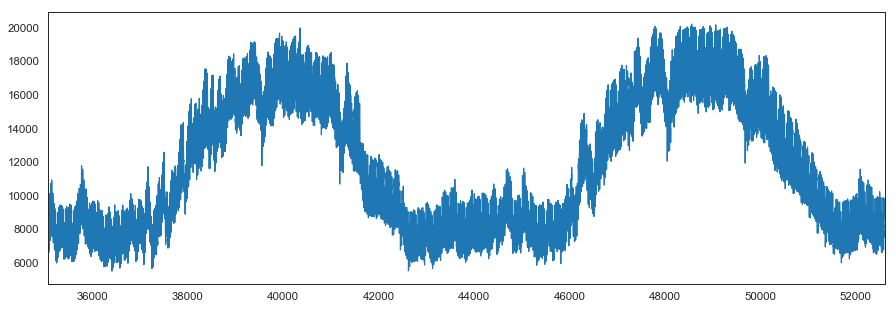

In [43]:
df_l[df_l.Time > '2016-01-01 01:00:00'].COA.plot(figsize=(15,5)).autoscale(axis='x',tight=True)

In [42]:
# df_l.to_csv('full_COA.csv' , index=False)